<a href="https://colab.research.google.com/github/VijayRajSing666/Equity-market-Price-prediction-and-forecaste-and-analysis/blob/main/Equity%20price%20of%20reliance%20with%20forcaste%20and%20trend%20%26%20Technical%20analysis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equity

equity, each unit of which is called a share, represent ownership of a company. Stocks, owned either directly or through a mutual fund or ETF, will likely form the majority of most investor’s portfolios.

Resource

https://towardsdatascience.com/data-analysis-visualization-in-finance-technical-analysis-of-stocks-using-python-269d535598e4
https://towardsdatascience.com/making-a-trade-call-using-simple-moving-average-sma-crossover-strategy-python-implementation-29963326da7a
https://technical-analysis-library-in-python.readthedocs.io/en/latest/


In [1]:
!pip install --upgrade pandas-datareader
!pip install yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_datareader as data
import datetime
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
df = yf.download("RELIANCE.NS", start="2015-01-01", end="2023-02-19")
df=pd.DataFrame(df)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988953,1367720
2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882629,3383424
2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316223,4662967
2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603485,8596809
2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171356,9562421
2015-01-08,426.011841,427.398682,416.130493,417.071564,396.404510,9171029
2015-01-09,420.216766,426.952911,418.532715,426.110901,404.995941,6180769
2015-01-12,426.209961,426.457611,416.848694,421.157837,400.288269,4661200
2015-01-13,422.495178,423.460999,416.303864,417.616425,396.922363,4591328


In [5]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-06,2315.000000,2321.000000,2305.800049,2311.449951,2311.449951,6847679
2023-02-07,2312.000000,2327.399902,2293.000000,2305.899902,2305.899902,6985001
2023-02-08,2313.000000,2359.899902,2307.000000,2351.949951,2351.949951,9765490
2023-02-09,2353.449951,2370.850098,2334.000000,2356.050049,2356.050049,6079228
2023-02-10,2354.899902,2354.899902,2321.300049,2336.649902,2336.649902,4979789
2023-02-13,2340.199951,2350.000000,2313.550049,2323.350098,2323.350098,4777674
2023-02-14,2329.949951,2381.899902,2323.649902,2378.100098,2378.100098,6609564
2023-02-15,2376.000000,2437.199951,2373.000000,2431.949951,2431.949951,15461902
2023-02-16,2449.449951,2463.800049,2425.050049,2430.050049,2430.050049,7967558


In [6]:
df.shape

(2010, 6)

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2010 entries, 2015-01-01 to 2023-02-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2010 non-null   float64
 1   High       2010 non-null   float64
 2   Low        2010 non-null   float64
 3   Close      2010 non-null   float64
 4   Adj Close  2010 non-null   float64
 5   Volume     2010 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 109.9 KB


In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2.010000e+03
mean,1334.724214,1349.747757,1318.904302,1333.730430,1319.533868,9.051196e+06
std,759.723080,767.838152,750.838484,759.012552,763.439821,6.652384e+06
min,404.466064,405.010895,394.485657,401.568542,381.669708,7.871600e+05
25%,534.929382,539.925781,529.487259,533.771637,518.544479,5.241742e+06
50%,1194.551819,1210.773071,1176.225525,1194.081360,1179.436829,7.126251e+06
75%,2083.162537,2103.037537,2053.175049,2081.562561,2069.168945,1.021388e+07
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,6.584835e+07


In [13]:
df.nunique()
df['Date'] = df.index

In [14]:
df

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988953,1367720,2015-01-01
2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882629,3383424,2015-01-02
2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316223,4662967,2015-01-05
2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603485,8596809,2015-01-06
2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171356,9562421,2015-01-07
...,...,...,...,...,...,...,...
2023-02-13,2340.199951,2350.000000,2313.550049,2323.350098,2323.350098,4777674,2023-02-13
2023-02-14,2329.949951,2381.899902,2323.649902,2378.100098,2378.100098,6609564,2023-02-14
2023-02-15,2376.000000,2437.199951,2373.000000,2431.949951,2431.949951,15461902,2023-02-15


In [15]:
print("Starting date: ",df.iloc[0][-1])
print("Ending date: ", df.iloc[-1][-1])
print("Duration: ", df.iloc[-1][-1]-df.iloc[0][-1])

Starting date:  2015-01-01 00:00:00
Ending date:  2023-02-17 00:00:00
Duration:  2969 days 00:00:00


In [16]:
monthvise= df.groupby(df['Date'].dt.strftime('%B'))[['Open','Close']].mean().sort_values(by='Close')

In [17]:
monthvise

,Open,Close
Date,,
March,1178.177184,1179.021260
May,1219.069386,1216.125060
April,1228.343230,1229.834708
February,1269.933348,1270.962361
June,1297.218154,1297.440264
July,1316.288851,1315.651537
January,1321.952501,1318.675390
August,1371.207623,1370.863596
November,1448.704915,1446.404296


In [18]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [19]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='#BE3525'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='#25BE4B'
))
fig.update_layout(barmode='group', title='Monthwise comparision between Stock open and close price', title_x=0.5, width=1200, height=400)
fig.show()

In [20]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

Date
April        402.732483
August       405.159485
December     452.139160
February     414.372162
January      411.697510
July         480.445862
June         432.723206
March        394.485657
May          424.575439
November     450.702789
October      425.268890
September    408.676147
Name: Low, dtype: float64

In [21]:
df.groupby(df['Date'].dt.strftime('%B'))['Low'].max()

Date
April        2786.100098
August       2655.550049
December     2716.000000
February     2425.050049
January      2548.199951
July         2495.000000
June         2752.050049
March        2628.600098
May          2758.050049
November     2698.199951
October      2708.000000
September    2601.000000
Name: Low, dtype: float64

In [22]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].min()

Date
April        414.124512
August       426.284241
December     467.295502
February     421.009247
January      419.523346
July         483.813934
June         441.143402
March        405.010895
May          435.100677
November     461.277557
October      432.871796
September    416.501984
Name: High, dtype: float64

In [23]:
df.groupby(df['Date'].dt.strftime('%B'))['High'].max()

Date
April        2856.149902
August       2676.899902
December     2755.000000
February     2463.800049
January      2606.000000
July         2592.000000
June         2817.350098
March        2688.000000
May          2805.500000
November     2745.449951
October      2751.350098
September    2629.699951
Name: High, dtype: float64

In [24]:
monthvise_high= df.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_low= df.groupby(df['Date'].dt.strftime('%B'))['Low'].min()

In [25]:
fig = px.line(df, x=df.Date, y=[df['Open'], df['Close'],df['High'], df['Low']], labels={'date': 'Date','value':'Stock value'},width=1200, height=400)
fig.update_layout(title_text='Stock analysis chart', font_size=10, font_color='Black',legend_title_text='Stock Parameters', title_x=0.5)
fig.show()

In [26]:
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2010, 2)


In [27]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'Date':'Date','Close':'Close Stock'})
fig.update_layout(title_text='Stock close price chart', font_size=10, font_color='black', title_x = 0.5, width=1200, height=400)
fig.show()

Evaluation Metrics
mean_squared_error:

This is a metric that measures the average squared difference between the predicted and actual values. It is calculated as the mean of the squared differences between the predicted and actual values. This metric is useful for penalizing large errors in the predictions, and is commonly used as a loss function during training. However, it can be sensitive to outliers and does not provide an easily interpretable measure of error in the original units of the response variable.
mean_absolute_error:

This is a metric that measures the average absolute difference between the predicted and actual values. It is calculated as the mean of the absolute differences between the predicted and actual values. This metric provides an easily interpretable measure of error in the original units of the response variable, and is less sensitive to outliers than the mean squared error.
explained_variance_score:

This is a metric that measures the proportion of variance in the target variable that is explained by the model. It is calculated as 1 - (variance of residuals / variance of target variable). This metric provides an indication of how well the model fits the data and can be interpreted as the amount of information captured by the model.
r2_score:

This is a metric that measures the proportion of variance in the target variable that is explained by the model, normalized by the total variance in the target variable. It is calculated as 1 - (sum of squared residuals / total sum of squares). This metric provides a normalized indication of how well the model fits the data, and can be interpreted as the percentage of variance in the target variable that is explained by the model. It ranges from 0 to 1, with 1 indicating a perfect fit and values close to 0 indicating poor performance.
mean_poisson_deviance:

It is a metric that measures the goodness of fit of a Poisson regression model. It compares the predicted values of the model with the observed values and calculates the mean deviation of the predicted values from the observed values. A lower value of this metric indicates a better fit of the model to the data.
mean_gamma_deviance:

It is a metric that measures the goodness of fit of a Gamma regression model. It compares the predicted values of the model with the observed values and calculates the mean deviation of the predicted values from the observed values. A lower value of this metric indicates a better fit of the model to the data.
accuracy_score:

It is a metric used to evaluate the performance of a classification model. It calculates the proportion of correctly predicted labels to the total number of samples. A higher value of this metric indicates a better classification performance of the model.
Scaling
MinMaxScaler:

MinMaxScaler is a technique used in data preprocessing to scale and transform features or variables of a dataset to a particular range, usually between 0 and 1. This technique helps to normalize the data and make it more consistent, making it easier to compare and analyze the data.
MinMaxScaler is a simple linear scaling technique that works by subtracting the minimum value of the feature and then dividing by the range (i.e., the difference between the maximum and minimum values) of the feature. The resulting values are then rescaled to fit within the desired range.
MinMaxScaler is commonly used in machine learning algorithms, especially in algorithms that involve distance calculations or optimization, such as clustering, gradient descent, and neural networks. It helps to improve the performance of the algorithms by reducing the influence of the scale of the variables on the model.

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

Sequential:

A Sequential model is a linear stack of layers, where you can add one layer at a time and the output of the previous layer is automatically fed as input to the next layer.
Dense:

A Dense layer is a fully connected layer, where each neuron in the layer is connected to every neuron in the previous and next layers.



In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.express as px

In [32]:
np.array(closedf['Close']).reshape(-1,1)
closedf

,Date,Close
Date,,
2015-01-01,2015-01-01,439.781311
2015-01-02,2015-01-02,438.617340
2015-01-05,2015-01-05,433.812897
2015-01-06,2015-01-06,414.124512
2015-01-07,2015-01-07,423.139069
...,...,...
2023-02-13,2023-02-13,2323.350098
2023-02-14,2023-02-14,2378.100098
2023-02-15,2023-02-15,2431.949951


In [33]:
close_stock = closedf.copy()
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(2010, 1)


In [34]:
training_size=int(len(closedf)*0.75)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
# print(train_data)
# print(test_data)

train_data:  (1507, 1)
test_data:  (503, 1)


In [35]:
# convert an array of values into a dataset matrix
"""
This function creates a sliding window of size time_step over the input dataset and constructs a set of input-output pairs for training a time series forecasting model. 
The input matrix dataX contains n rows, where n is the number of time steps in the input sequence, and time_step columns, representing the past time_step values of the 
input sequence. The output matrix dataY contains n rows and 1 column,representing the next value in the sequence to be predicted.
"""
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1491, 15)
y_train:  (1491,)
X_test:  (487, 15)
y_test (487,)


In [37]:
# reshape input to be [samples, time steps, features] which is required for LSTM
# LSTM requies 3-dimensional input
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1491, 15, 1)
X_test:  (487, 15, 1)


In [38]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=5,verbose=1)

Epoch 1/10
299/299 [==============================] - 14s 27ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 2/10
299/299 [==============================] - 7s 23ms/step - loss: 7.7523e-04 - val_loss: 0.0067
Epoch 3/10
299/299 [==============================] - 7s 24ms/step - loss: 7.8438e-04 - val_loss: 0.0016
Epoch 4/10
299/299 [==============================] - 6s 20ms/step - loss: 7.7958e-04 - val_loss: 0.0014
Epoch 5/10
299/299 [==============================] - 7s 23ms/step - loss: 5.6187e-04 - val_loss: 0.0011
Epoch 6/10
299/299 [==============================] - 6s 20ms/step - loss: 5.1619e-04 - val_loss: 9.0280e-04
Epoch 7/10
299/299 [==============================] - 8s 27ms/step - loss: 4.0820e-04 - val_loss: 0.0010
Epoch 8/10
299/299 [==============================] - 6s 19ms/step - loss: 4.5589e-04 - val_loss: 0.0014
Epoch 9/10
299/299 [==============================] - 7s 23ms/step - loss: 3.5004e-04 - val_loss: 5.9829e-04
Epoch 10/10
299/299 [=============================

In [40]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

16/16 [==============================] - 0s 6ms/step


((1491, 1), (487, 1))

In [41]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [42]:
# Evaluation metrices RMSE and MAE
print("---------------------------------------------------------------------------------------------------------")
print("Train data RMSE: ", np.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Test data RMSE: ", np.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))
print("---------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------
Train data RMSE:  38.803812496643495
Train data MSE:  1505.735864274666
Test data MAE:  25.939795572752917
---------------------------------------------------------------------------------------------------------
Test data RMSE:  82.87406647692902
Test data MSE:  6868.110894422451
Test data MAE:  68.68543808954698
---------------------------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9949962377427554
Test data explained variance regression score: 0.9342823604835806
---------------------------------------------------------------------------------------------------------
Train data R2 score: 0.9940493114861123
Test data R2 score: 0.8556152015824585
---------------------------------------------------------------------------------------------------------
Train data MGD:  0.0011213605492810773
Test data

In [43]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9949962377427554
Test data explained variance regression score: 0.9342823604835806


In [44]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.9940493114861123
Test data R2 score: 0.8556152015824585


In [45]:
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],'original_close': close_stock['Close'],'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                       'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})
fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'], plotdf['test_predicted_close']],labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',font_size=10, font_color='black',legend_title_text='Close Price',title_x = 0.5, width = 1200, height = 400)
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2010, 1)
Test predicted data:  (2010, 1)


In [49]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
          if(len(temp_input)>time_step):
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            yhat = model.predict(np.expand_dims(x_input, 2))
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0])
            temp_input=temp_input[1:]

            lst_output.extend(yhat.tolist())
            i=i+1     
          else:
            yhat = model.predict(np.expand_dims(x_input, 2))
            temp_input.extend(yhat[0])
            lst_output.extend(yhat.tolist())
            
            i=i+1   
print("Output of predicted next days: ", len(lst_output))
print("Output of predicted next days: ",lst_output)

1/1 [==============================] - 0s 23ms/step
Output of predicted next days:  30
Output of predicted next days:  [[0.8073568940162659], [0.8060187101364136], [0.800140380859375], [0.79246985912323], [0.7843042016029358], [0.7761467099189758], [0.7682695984840393], [0.7607213258743286], [0.753372848033905], [0.7463281750679016], [0.7396274209022522], [0.7332223057746887], [0.7268692255020142], [0.7205053567886353], [0.7142342329025269], [0.707973062992096], [0.7019954323768616], [0.6960523724555969], [0.690177857875824], [0.6843821406364441], [0.6786666512489319], [0.673030436038971], [0.6674716472625732], [0.6619881987571716], [0.6565791964530945], [0.6512421369552612], [0.6459742784500122], [0.6407724022865295], [0.6356355547904968], [0.6305621862411499]]


In [50]:
# Creating list of days to use for comparision
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat
len(last_original_days_value)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


45

In [51]:
#  Creating empty dataframe for ploting graph
temp_mat = np.empty((len(last_days)+pred_days,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat.copy()
next_predicted_days_value = temp_mat.copy()

# Storing last 15 days and next 30 days values for comparision
last_original_days_value[0:time_step] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]
new_pred_plot = pd.DataFrame({
    'last_15_original_days_value':last_original_days_value,
    'next_30_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_15_original_days_value'],new_pred_plot['next_30_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days', font_size=10, font_color='black',legend_title_text='Close Price', title_x =0.5,width = 1200, height = 400)
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)  
fig.show()

In [52]:
# Creating list of close price
lstmdf=closedf.tolist()
# Adding next 30 days prediction
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
# Tranforming to iriginal values
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]
fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',font_size=10, font_color='black',legend_title_text='Stock Price', title_x =0.5, width = 1200, height = 400)
fig.show()

LSTM (Long Short-Term Memory) is a type of recurrent neural network architecture that is commonly used for sequence modeling tasks, such as natural language processing and time series prediction. LSTM has several parameters that are used to control the behavior of the network. Here is an explanation of the main parameters used in LSTM:


1.Input shape: This parameter defines the shape of the input data that is fed to the LSTM network. In Keras, the input shape is specified as a tuple that contains the number of time steps in the sequence and the number of input features in each time step.

2.Number of hidden units: This parameter determines the number of hidden units in the LSTM layer. More hidden units generally allow the network to capture more complex patterns in the input data, but also require more computational resources.

3.Activation function: This parameter determines the activation function used in the LSTM layer. The most commonly used activation functions in LSTM are the hyperbolic tangent (tanh) function and the sigmoid function. The activation function is used to control the output of the LSTM cell and can help to prevent vanishing or exploding gradients during training.

4.Dropout: This parameter is used to prevent overfitting in the LSTM network by randomly dropping out some of the LSTM units during training.

5.Recurrent dropout: This parameter is similar to the dropout parameter, but is used to randomly drop out some of the connections between the LSTM cells during training.

6.Number of time steps: This parameter determines the number of time steps in the input sequence. In many applications, the number of time steps is fixed, but it can also be variable.

7.Batch size: This parameter determines the number of samples in each training batch. A larger batch size can help to speed up training, but can also require more memory.

8.Learning rate: This parameter determines the step size used in the optimization algorithm during training. A smaller learning rate can help to prevent overshooting the optimal solution, but can also make the training process slower.

Sequential Model
In deep learning, a sequential model is a type of neural network architecture in which the layers are arranged sequentially, or one after the other, with no branching. This means that the output of each layer is fed as input to the next layer, in a chain-like sequence.

The sequential model is a popular choice for many deep learning applications, as it is simple and easy to use. However, it may not be appropriate for all types of problems, such as those that require more complex network architectures with multiple inputs or outputs. In those cases, other types of neural network architectures, such as recurrent neural networks or convolutional neural networks, may be more appropriate.

In [61]:
#Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [62]:
print(df.columns.tolist())

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date']


In [63]:
data_training.shape

(1407, 1)

In [64]:
data_testing.shape

(603, 1)

In [65]:
df.shape

(2010, 7)

In [66]:
data_training.head()

,Close
Date,
2015-01-01,439.781311
2015-01-02,438.617340
2015-01-05,433.812897
2015-01-06,414.124512
2015-01-07,423.139069


In [67]:
data_testing.tail()

,Close
Date,
2023-02-13,2323.350098
2023-02-14,2378.100098
2023-02-15,2431.949951
2023-02-16,2430.050049
2023-02-17,2440.199951


In [68]:
#Scaling down the data for LSTM model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [69]:
data_training_array = scaler.fit_transform(data_training)

In [70]:
# Splitting int train and test
X_train = []
y_train = []
# Price on 11th day is dependent on previoud day price. Steps = 100 daya here
# For first 100 days will be feature (X_train) and next day will be y_train
# After each step steps, it will forget  one data
# (34 36 33 40 39 38 37 42 44 38) --X_train (11th day)--y_train

In [71]:
for i in range(100, data_training.shape[0]):
  X_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

In [72]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [73]:
X_train.shape

(1307, 100, 1)

In [74]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [75]:
data_training_array = scaler.fit_transform(data_training)

In [76]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_10 (LSTM)              (None, 120)              

In [78]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
41/41 [==============================] - 18s 294ms/step - loss: 0.0399
Epoch 2/10
41/41 [==============================] - 12s 294ms/step - loss: 0.0093
Epoch 3/10
41/41 [==============================] - 12s 298ms/step - loss: 0.0059
Epoch 4/10
41/41 [==============================] - 13s 319ms/step - loss: 0.0047
Epoch 5/10
41/41 [==============================] - 13s 305ms/step - loss: 0.0060
Epoch 6/10
41/41 [==============================] - 13s 322ms/step - loss: 0.0059
Epoch 7/10
41/41 [==============================] - 14s 343ms/step - loss: 0.0044
Epoch 8/10
41/41 [==============================] - 15s 357ms/step - loss: 0.0042
Epoch 9/10
41/41 [==============================] - 12s 302ms/step - loss: 0.0038
Epoch 10/10
41/41 [==============================] - 12s 298ms/step - loss: 0.0045


In [79]:
model.save('keras_model.h5')

In [80]:
#We have to append last 100 days data from the training dataset to predict the value for testing data
# Because for index 2290, no previous data is available
past_100_days = data_training.tail(100)

In [81]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [82]:
# Scaline down the test data
input_data = scaler.transform(final_df)

In [83]:
input_data.shape

(703, 1)

In [84]:
X_test = []
y_test = [] 

In [85]:
for i in range(100, input_data.shape[0]):
  X_test.append(data_training_array[i-100:i])
  y_test.append(data_training_array[i,0])

In [86]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [87]:
X_test.shape

(603, 100, 1)

In [88]:
# Making predictions
y_pred = model.predict(X_test)

19/19 [==============================] - 2s 84ms/step


In [89]:
y_pred.shape

(603, 1)

In [90]:
y_test.shape

(603,)

In [91]:
# Scaling up the value because it was scaled down
scale_factor = 1/scaler.scale_
y_pred = y_pred *scale_factor
y_test = y_test *scale_factor

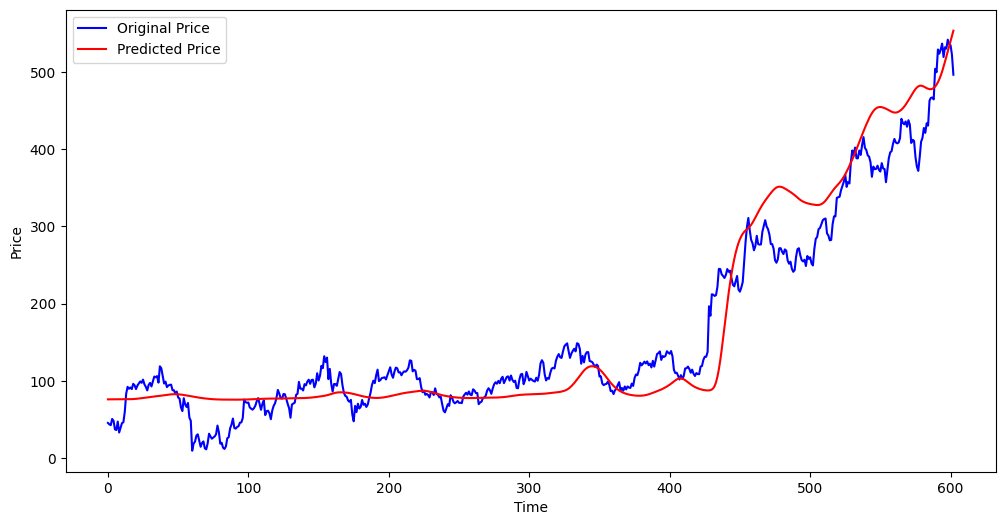

In [92]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Yahoo finance github link and syntax:

https://github.com/ranaroussi/yfinance

TECHNICAL ANALYSIS

In [113]:
df.sort_values(by ='Date', ascending = False).head()

,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,
2023-02-17,2420.000000,2447.500000,2410.600098,2440.199951,2440.199951,5450092,0.417683,Slight or No change
2023-02-16,2449.449951,2463.800049,2425.050049,2430.050049,2430.050049,7967558,-0.078123,Slight or No change
2023-02-15,2376.000000,2437.199951,2373.000000,2431.949951,2431.949951,15461902,2.264407,Positive
2023-02-14,2329.949951,2381.899902,2323.649902,2378.100098,2378.100098,6609564,2.356511,Positive
2023-02-13,2340.199951,2350.000000,2313.550049,2323.350098,2323.350098,4777674,-0.569183,Slight Negative


In [115]:
df.shape

(2009, 8)

In [116]:
df = df.reset_index()

In [117]:
df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Day_Perc_Change    0
Trend              0
dtype: int64

In [118]:
df.dtypes

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Adj Close                 float64
Volume                      int64
Day_Perc_Change           float64
Trend                      object
dtype: object

In [119]:
df['Date'].max() - df['Date'].min()

Timedelta('2968 days 00:00:00')

In [120]:
df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
count,90,90,90,90,90,90,90
mean,2517,2538,2492,2516,2516,5523318,0
std,109,109,109,109,109,2671147,1
min,2312,2321,2293,2305,2305,1555270,-2
25%,2449,2464,2425,2440,2440,3542787,0
50%,2535,2554,2515,2540,2540,4970687,0
75%,2596,2614,2569,2597,2597,6409328,0
max,2741,2755,2716,2731,2731,15461902,3


In [121]:
df.index = df['Date']

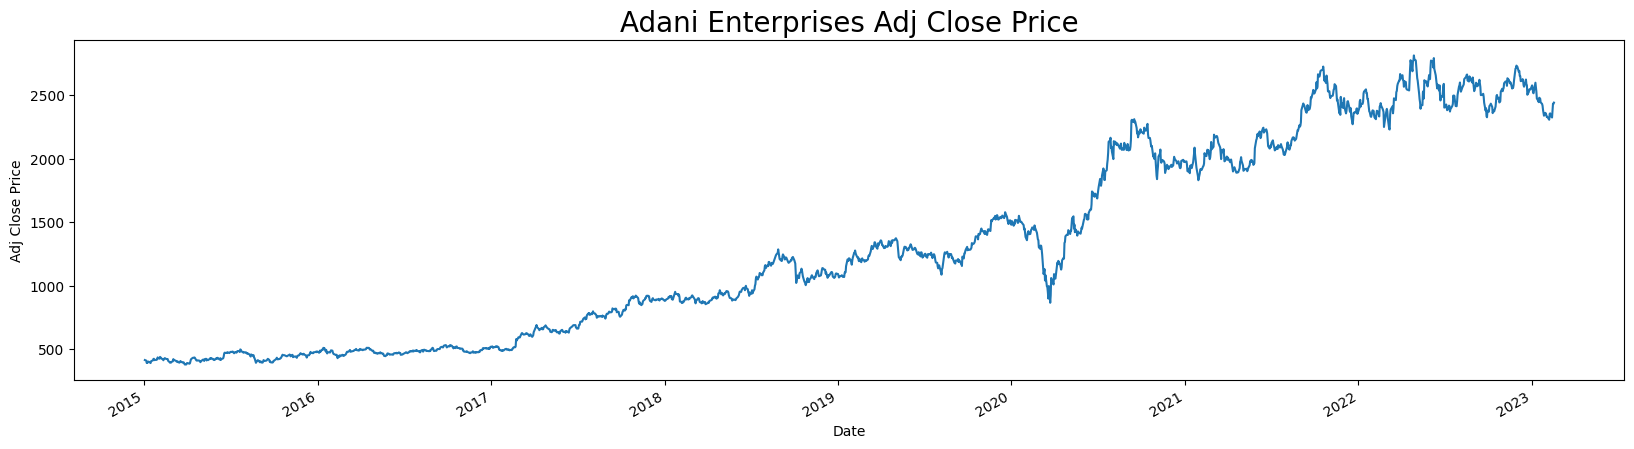

In [122]:
df['Adj Close'].plot(figsize = (20,5))
plt.title("Adani Enterprises Adj Close Price", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.show()

In [123]:
df['Day_Perc_Change'] = df['Adj Close'].pct_change()*100
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2015-01-02,2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882599,3383424,NaN,Slight or No change
2015-01-05,2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316223,4662967,-1.095363,Negative
2015-01-06,2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603485,8596809,-4.538443,Among top losers
2015-01-07,2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171326,9562421,2.176769,Positive
2015-01-08,2015-01-08,426.011841,427.398682,416.130493,417.071564,396.404510,9171029,-1.433920,Negative


In [124]:
# Drop 1st value because it is Nan
df.dropna(axis = 0, inplace = True)

Text(0, 0.5, 'Percenatge returns')

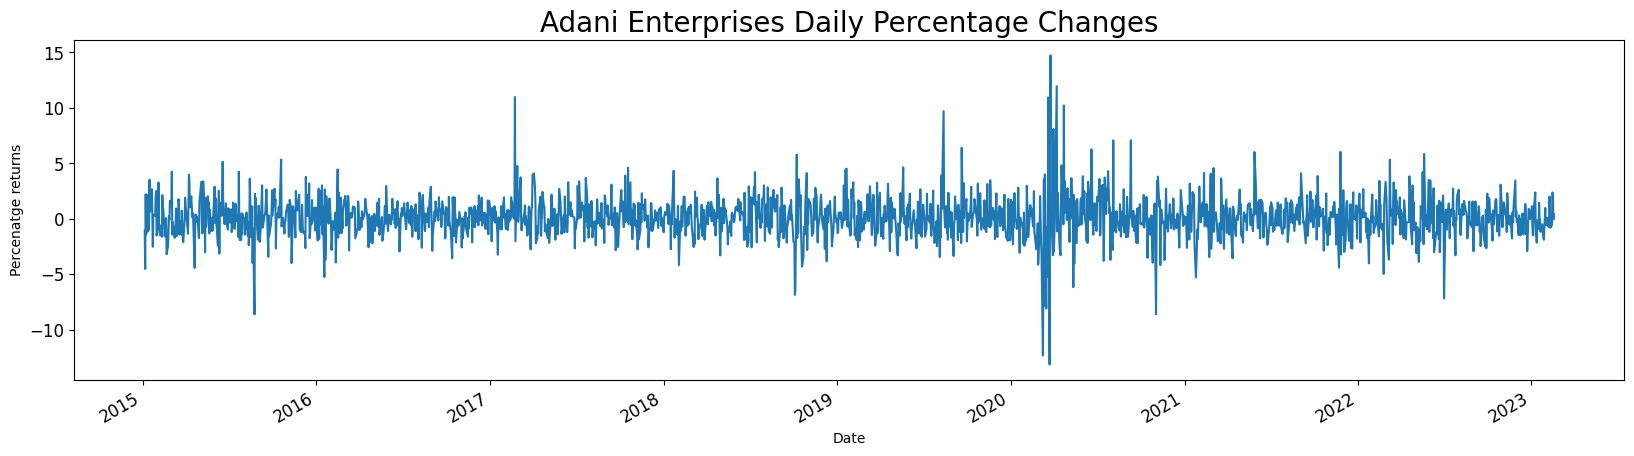

In [125]:
df['Day_Perc_Change'].plot(figsize = (20, 5), fontsize = 12)
plt.title("Adani Enterprises Daily Percentage Changes", fontsize = 20)
plt.xlabel('Date')
plt.ylabel('Percenatge returns')

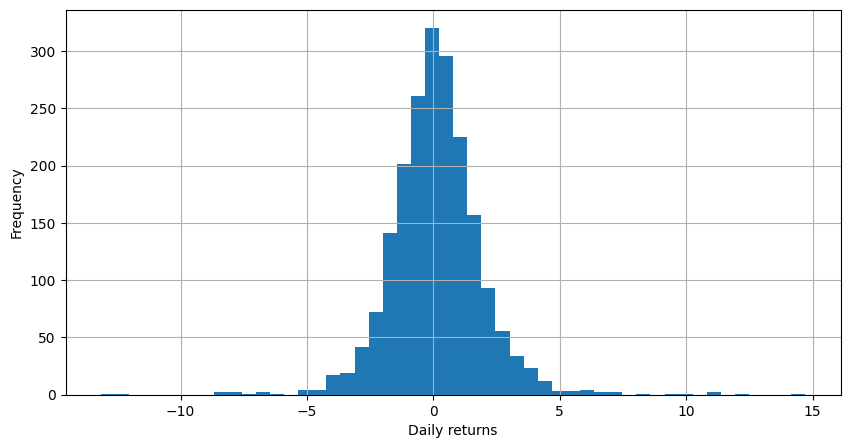

------------------------------------
Basic Statisics for Daily Percentages for 13 years


count    2008.000000
mean        0.104904
std         1.840210
min       -13.153896
25%        -0.907309
50%         0.074998
75%         1.094807
max        14.718034
Name: Day_Perc_Change, dtype: float64

In [126]:
df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()
print("------------------------------------")
print("Basic Statisics for Daily Percentages for 13 years")
df['Day_Perc_Change'].describe()

In [127]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
df['Trend']= np.zeros(df['Day_Perc_Change'].count())
df['Trend']= df['Day_Perc_Change'].apply(lambda x:trend(x))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2015-01-05,2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316223,4662967,-1.095363,Negative
2015-01-06,2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603485,8596809,-4.538443,Among top losers
2015-01-07,2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171326,9562421,2.176769,Positive
2015-01-08,2015-01-08,426.011841,427.398682,416.130493,417.071564,396.404510,9171029,-1.433920,Negative
2015-01-09,2015-01-09,420.216766,426.952911,418.532715,426.110901,404.995880,6180769,2.167324,Positive


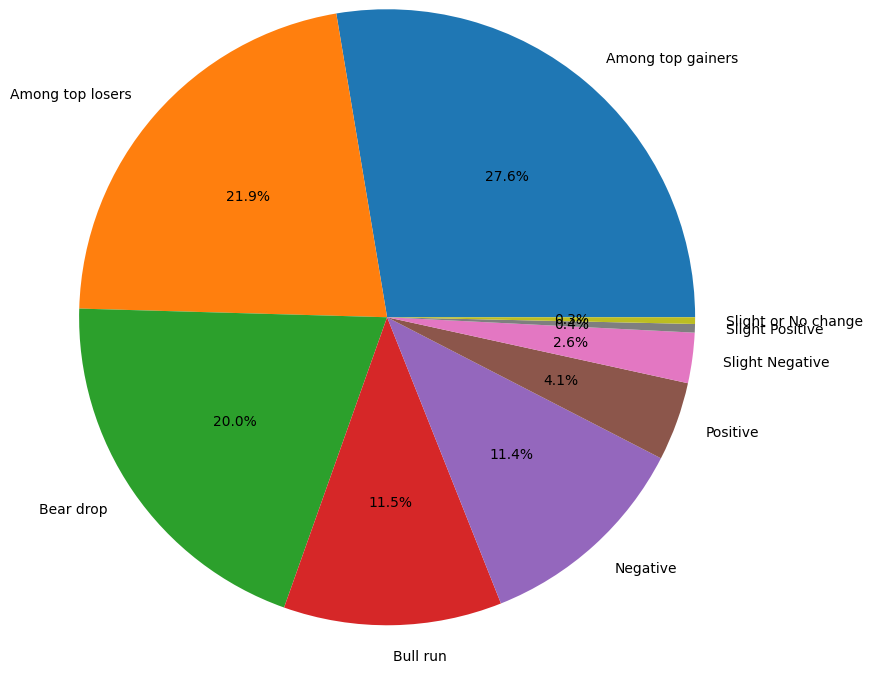

In [128]:
plt.figure(figsize=(20,5))
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(df['Trend'].value_counts(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

In [129]:
df.index = df['Date']

<Axes: xlabel='Date'>

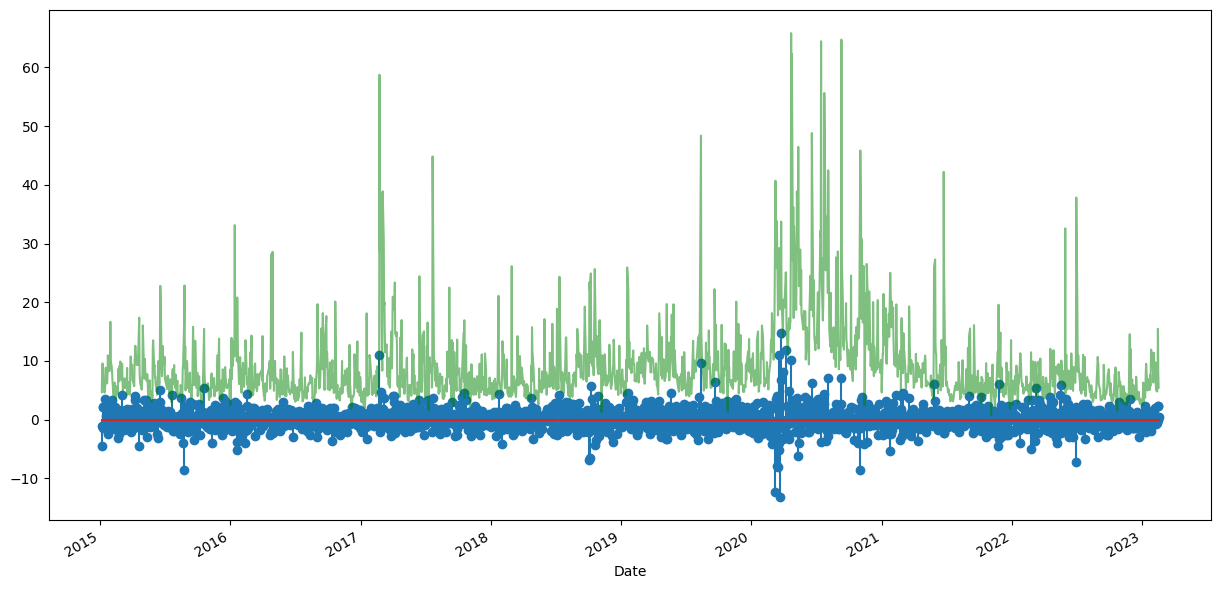

In [130]:
plt.stem(df['Date'], df['Day_Perc_Change'])
(df['Volume']/1000000).plot(figsize = (15, 7.5), color = 'green', alpha = 0.5)
# Daily volume of trade has been reduced in scale to match with the daily return scale

In [132]:
# Adj close price of all the stocks
combined_df = yf.download(["TATASTEEL.NS","RELIANCE.NS","INFY.NS"], start="2015-01-01", end="2023-02-12")['Adj Close']
combined_df = combined_df.round(2)
combined_df.head()

[*********************100%***********************]  3 of 3 completed


,INFY.NS,RELIANCE.NS,TATASTEEL.NS
Date,,,
2015-01-01,403.36,417.99,14.59
2015-01-02,411.29,416.88,14.82
2015-01-05,407.76,412.32,15.04
2015-01-06,399.24,393.60,14.31
2015-01-07,401.15,402.17,14.03


<Figure size 2000x500 with 0 Axes>

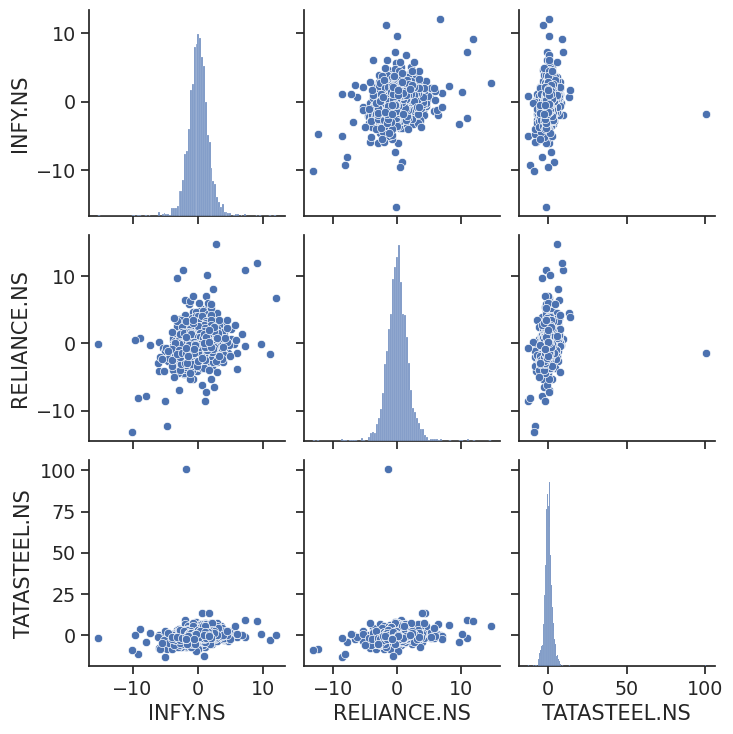

In [133]:
# store daily returns of all above stocks in a new dataframe 
pct_chg_df = combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = 'any', axis = 0)
# plotting pairplot  
import seaborn as sns
plt.figure(figsize = (20,5))
sns.set(style = 'ticks', font_scale = 1.25)
sns.pairplot(pct_chg_df)

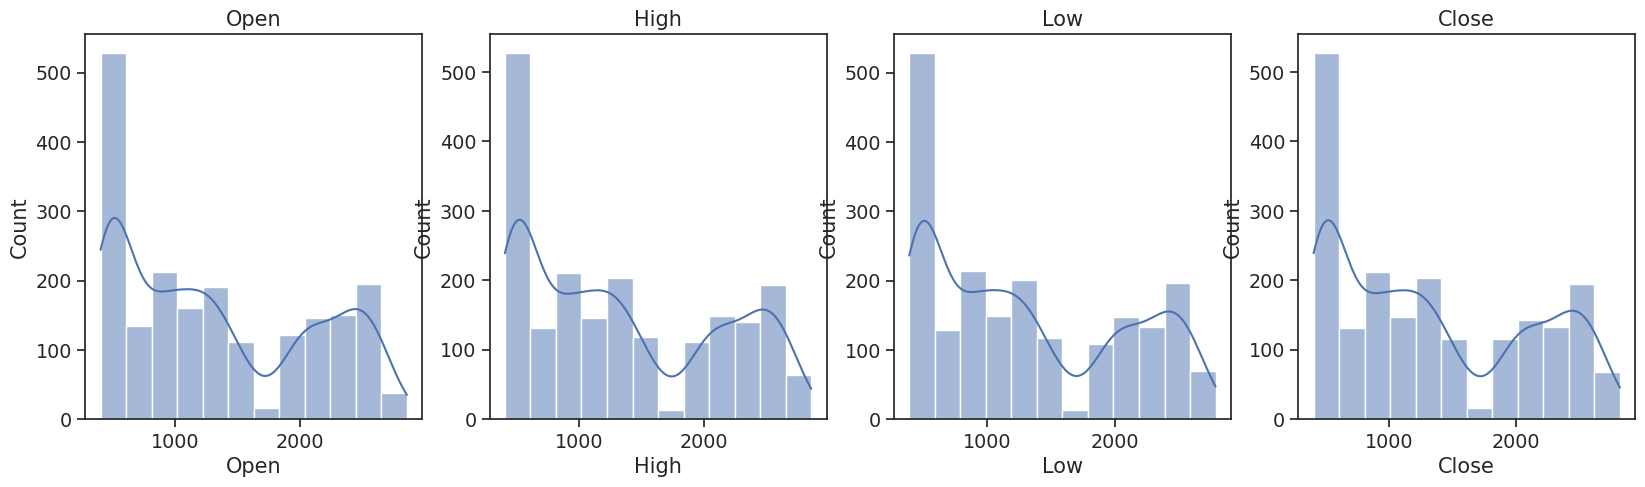

In [134]:
# Create a figure with four subplots
fig, axs = plt.subplots(ncols=4, figsize=(20, 5))

# Plot the joint plots for Open, High, Low, and Close
sns.histplot(df['Open'], ax=axs[0], kde=True)
axs[0].set_title('Open')
sns.histplot(df['High'], ax=axs[1], kde=True)
axs[1].set_title('High')
sns.histplot(df['Low'], ax=axs[2], kde=True)
axs[2].set_title('Low')
sns.histplot(df['Close'], ax=axs[3], kde=True)
axs[3].set_title('Close')

plt.show()

<Figure size 2000x500 with 0 Axes>

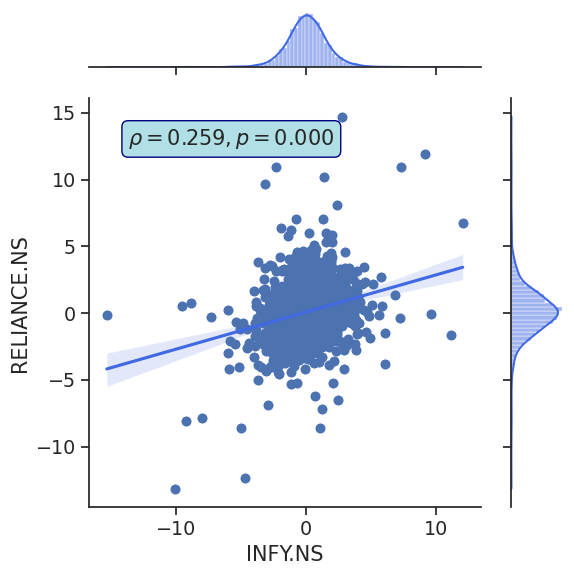

<Figure size 2000x500 with 0 Axes>

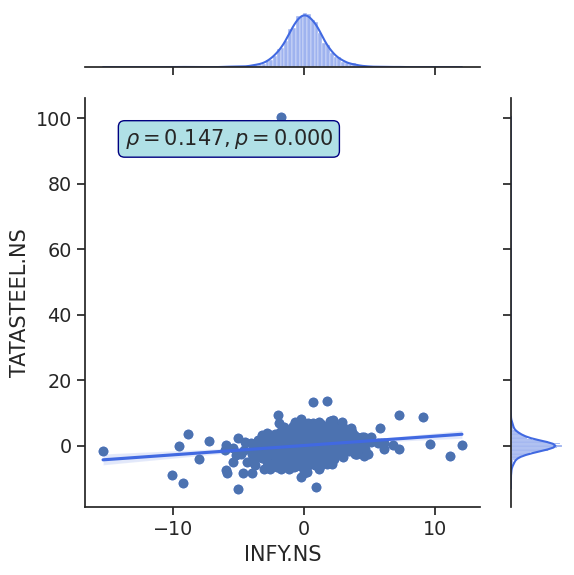

<Figure size 2000x500 with 0 Axes>

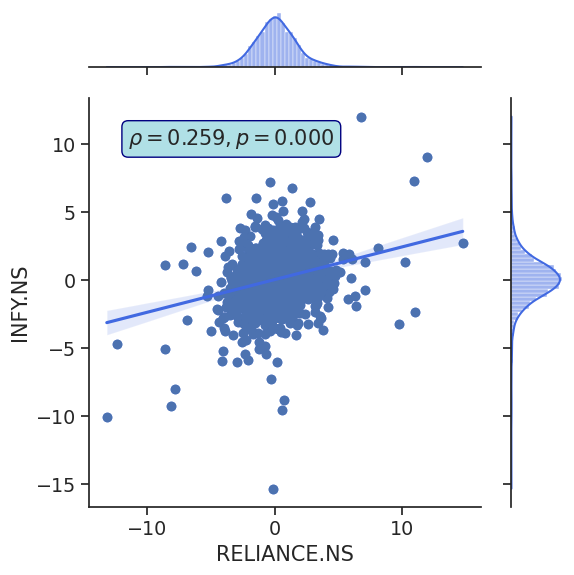

<Figure size 2000x500 with 0 Axes>

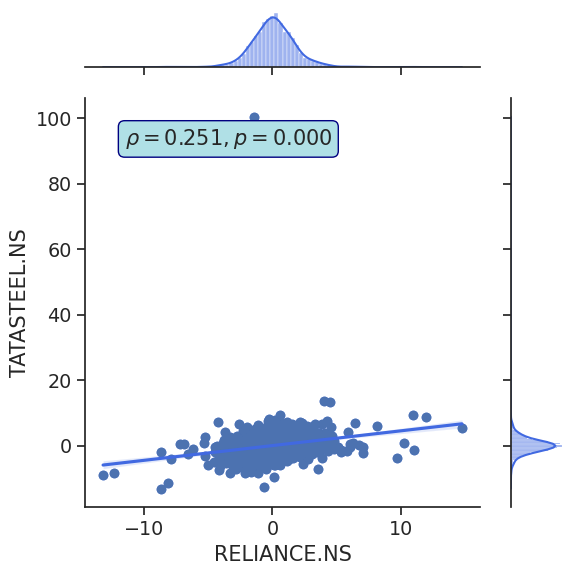

<Figure size 2000x500 with 0 Axes>

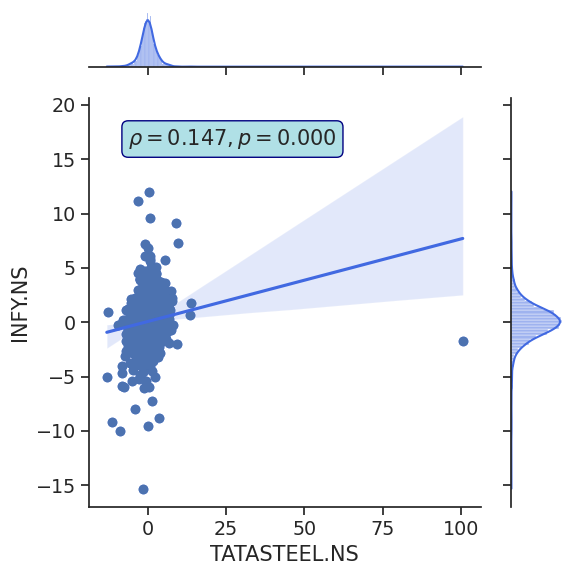

<Figure size 2000x500 with 0 Axes>

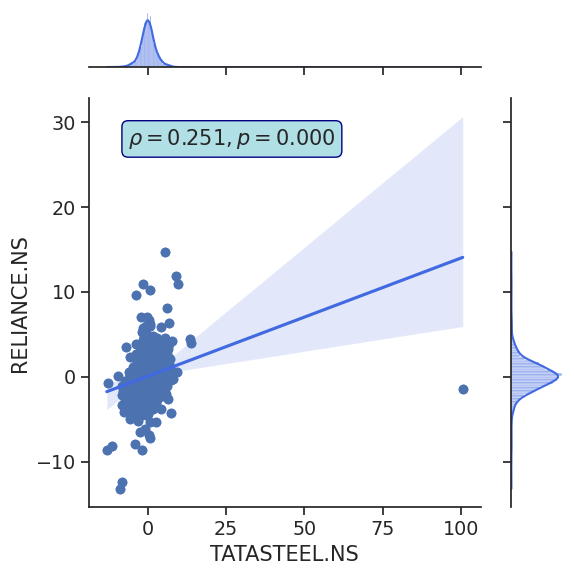

In [135]:
from scipy.stats import stats

def joint_plot(df, a, b):
  plt.figure(figsize=(20,5))
  g = sns.jointplot(x=df[a], y=df[b], kind='reg', color='royalblue')
  r, p = stats.pearsonr(df[a], df[b])
  g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',xy=(0.1, 0.9), xycoords='axes fraction',ha='left', va='center',bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
  g.ax_joint.scatter(df[a], df[b])
  g.set_axis_labels(xlabel=a, ylabel=b, size=15)
  plt.tight_layout()
  return g
index = 1
for i in pct_chg_df.columns:
  for j in pct_chg_df.columns:
      if i!=j:
        joint_plot(pct_chg_df,i,j)

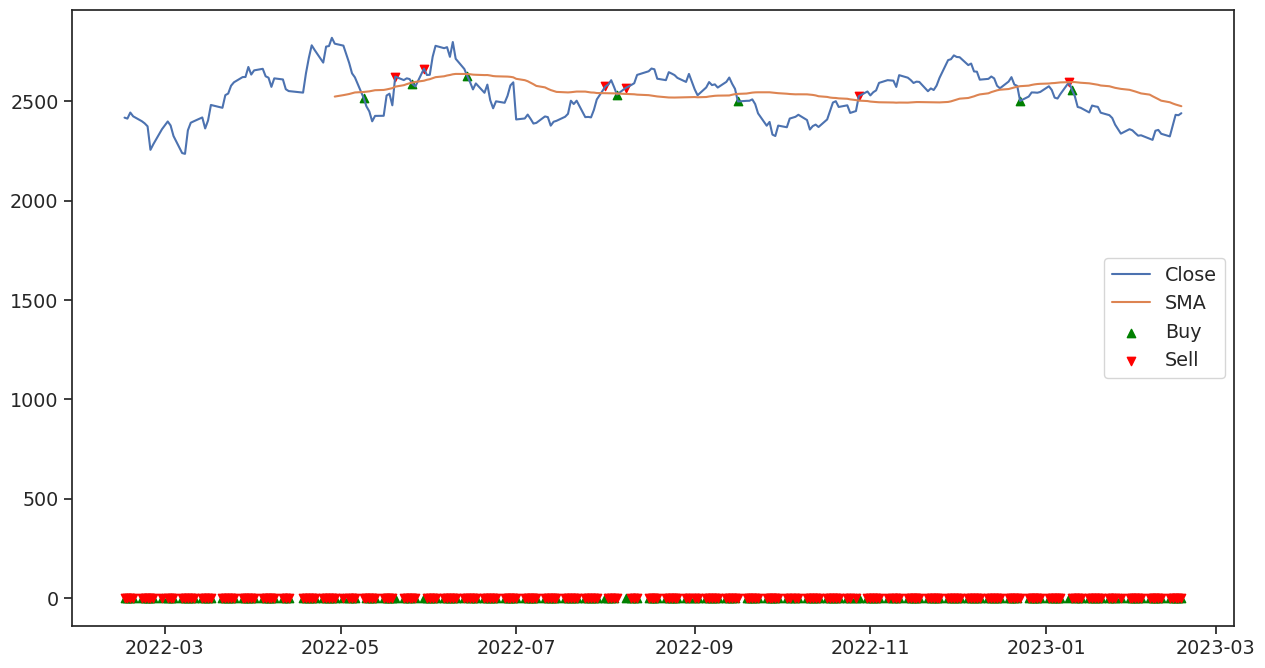

In [137]:
# Add a new column to the dataframe to hold buy and sell signals

df = df.iloc[-252:]
sma = df['Close'].rolling(window=50).mean()

buy_sell_df = pd.DataFrame(index=df.index)
buy_sell_df['SMA'] = sma
buy_sell_df['Close'] = df['Close']
buy_sell_df['Signal'] = 0.0
buy_sell_df['Buy'] = np.zeros(len(df))
buy_sell_df['Sell'] = np.zeros(len(df))

# Determine the buy and sell signals
for i in range(1, len(df)):
    if sma[i] > df['Close'][i] and sma[i-1] <= df['Close'][i-1]:
        buy_sell_df['Signal'][i] = 1.0
        buy_sell_df['Buy'][i] = df['Close'][i]
    elif sma[i] < df['Close'][i] and sma[i-1] >= df['Close'][i-1]:
        buy_sell_df['Signal'][i] = -1.0
        buy_sell_df['Sell'][i] = df['Close'][i]

# Create a plot of the stock price with sma and buy and sell signals
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df.index, df['Close'], label='Close')
ax.plot(sma.index, sma, label='SMA')
ax.scatter(buy_sell_df.index, buy_sell_df['Buy'], marker='^', color='green', label='Buy')
ax.scatter(buy_sell_df.index, buy_sell_df['Sell'], marker='v', color='red', label='Sell')
ax.legend()
plt.show()

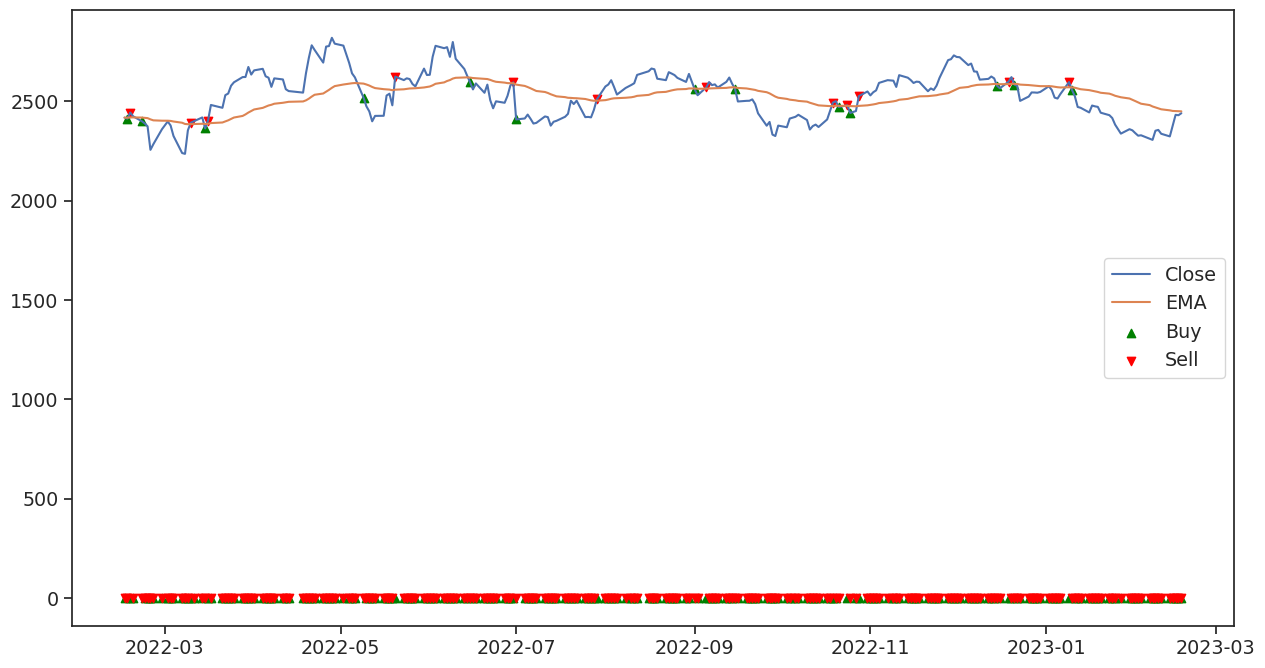

In [138]:
 #Add a new column to the dataframe to hold buy and sell signals

df = df.iloc[-252:]
ema = df['Close'].ewm(span=50, adjust=False).mean()

buy_sell_df = pd.DataFrame(index=df.index)
buy_sell_df['EMA'] = ema
buy_sell_df['Close'] = df['Close']
buy_sell_df['Signal'] = 0.0
buy_sell_df['Buy'] = np.zeros(len(df))
buy_sell_df['Sell'] = np.zeros(len(df))

# Determine the buy and sell signals
for i in range(1, len(df)):
    if ema[i] > df['Close'][i] and ema[i-1] <= df['Close'][i-1]:
        buy_sell_df['Signal'][i] = 1.0
        buy_sell_df['Buy'][i] = df['Close'][i]
    elif ema[i] < df['Close'][i] and ema[i-1] >= df['Close'][i-1]:
        buy_sell_df['Signal'][i] = -1.0
        buy_sell_df['Sell'][i] = df['Close'][i]

# Create a plot of the stock price with EMA and buy and sell signals
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(df.index, df['Close'], label='Close')
ax.plot(ema.index, ema, label='EMA')
ax.scatter(buy_sell_df.index, buy_sell_df['Buy'], marker='^', color='green', label='Buy')
ax.scatter(buy_sell_df.index, buy_sell_df['Sell'], marker='v', color='red', label='Sell')
ax.legend()
plt.show()